In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch

from bmadx import M_ELECTRON
from bmadx.bmad_torch.track_torch import Beam

from initial_beam import create_initial_beam, transform_to_bmad_coords
from training import generate_training_images, train_model

/home/jp/mambaforge/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# create openPMD-beamphysics particle group
par = create_initial_beam('data/gaussian.yaml')


# transform to bmad phase space coordinates
p0c = 10.0e6 # reference momentum in eV
coords = transform_to_bmad_coords(par, p0c)


# create bmad-x pytorch beam:
beam_in = Beam(
    torch.tensor(coords),
    s=torch.tensor(0.0),
    p0c=torch.tensor(10.0e6),
    mc2=torch.tensor(M_ELECTRON)
)

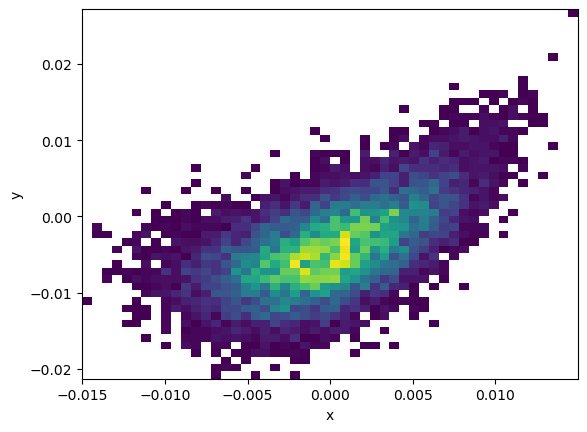

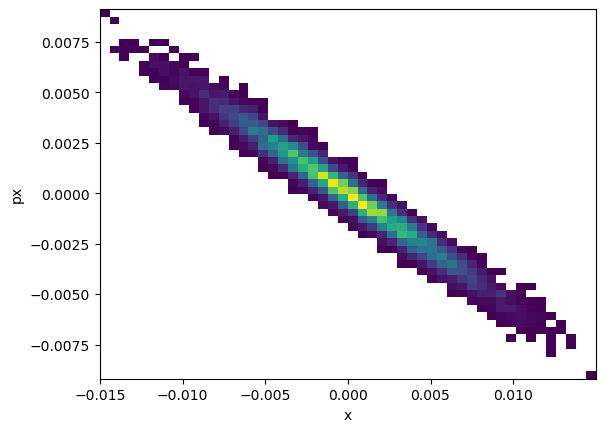

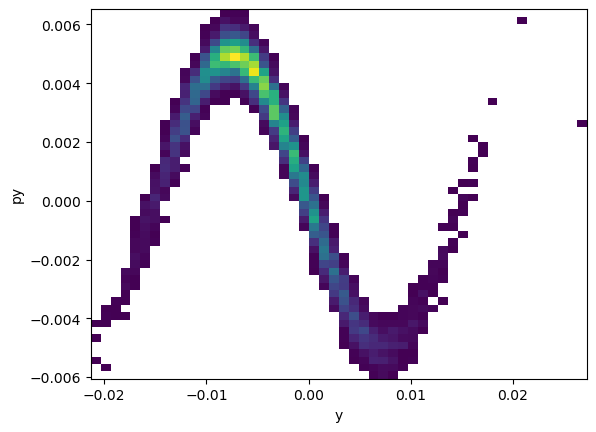

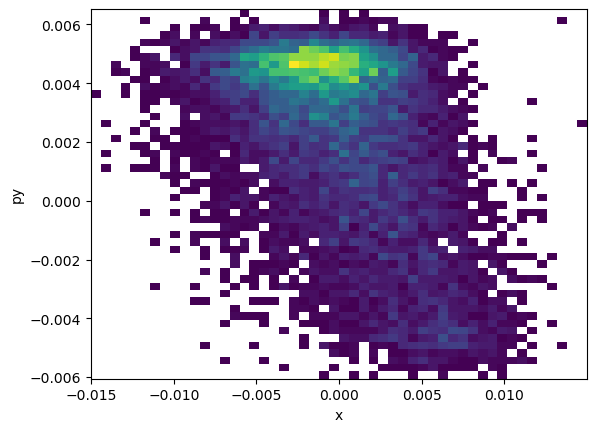

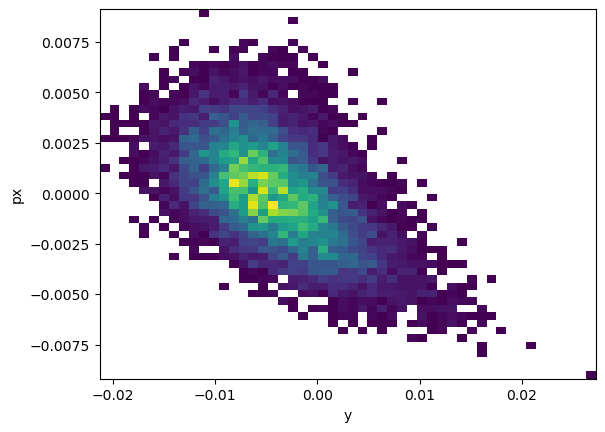

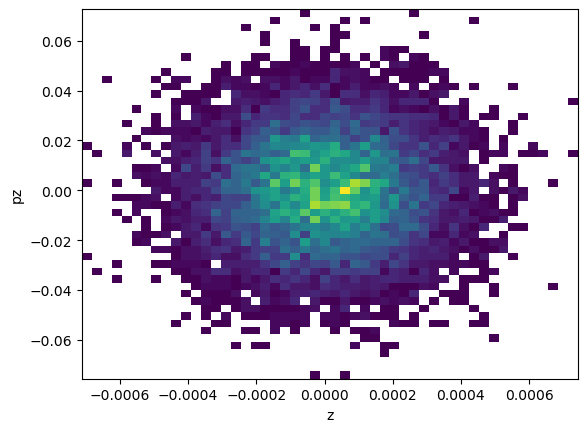

In [3]:
# plot proyections
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
bins = [50,50]

def plot_2d_hist(x, y, x_label, y_label):
    fig, ax = plt.subplots()
    ax.hist2d(x, y, bins=bins, cmap=mycmap, vmin=1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()

plot_2d_hist(beam_in.x.numpy(), beam_in.y.numpy(), 'x', 'y')
plot_2d_hist(beam_in.x.numpy(), beam_in.px.numpy(), 'x', 'px')
plot_2d_hist(beam_in.y.numpy(), beam_in.py.numpy(), 'y', 'py')
plot_2d_hist(beam_in.x.numpy(), beam_in.py.numpy(), 'x', 'py')
plot_2d_hist(beam_in.y.numpy(), beam_in.px.numpy(), 'y', 'px')
plot_2d_hist(beam_in.z.numpy(), beam_in.pz.numpy(), 'z', 'pz')
